Question 1: Understanding the Dataset 
<br>
Description: Load a dataset and understand its basic properties including data types dimensions, and first few rows

In [1]:
# Write your code from here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore

np.random.seed(1)
df = pd.DataFrame({
    'age': np.random.randint(18, 70, 100),
    'income': np.random.normal(50000, 15000, 100),
    'spending_score': np.random.uniform(1, 100, 100),
    'gender': np.random.choice(['Male', 'Female'], 100),
    'region': np.random.choice(['North', 'South', 'East', 'West'], 100)
})

df.loc[5:10, 'income'] = np.nan
df.loc[20:22, 'gender'] = np.nan

print("First 5 rows:")
print(df.head())
print("\nData Types:")
print(df.dtypes)
print("\nShape:", df.shape)

First 5 rows:
   age        income  spending_score  gender region
0   55  52896.769443       22.060636    Male   East
1   61  26704.888873        8.351585  Female   West
2   30  49849.796930       10.446506  Female  South
3   26  59737.482997       17.058346  Female  North
4   27  73378.593986       36.289904  Female   West

Data Types:
age                 int64
income            float64
spending_score    float64
gender             object
region             object
dtype: object

Shape: (100, 5)


Question 2: Checking for Missing Values
<br>
Description: Identify missing values in the dataset.

In [2]:
# Write your code from here
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
age               0
income            6
spending_score    0
gender            3
region            0
dtype: int64


Question 3: Descriptive Statistics
<br>
Description: Calculate descriptive statistics for numerical columns.

In [3]:
# Write you code from here
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
             age        income  spending_score
count  100.00000     94.000000      100.000000
mean    41.20000  47933.269659       42.319417
std     15.30564  14469.123369       29.161128
min     18.00000  13670.432821        1.461668
25%     27.00000  38403.108181       17.489957
50%     40.50000  47518.824712       36.455854
75%     55.00000  58450.381960       68.842770
max     69.00000  78857.478578       96.606954


Question 4: Handling Outliers
<br>
Description: Identify outliers in numerical columns using box plots.

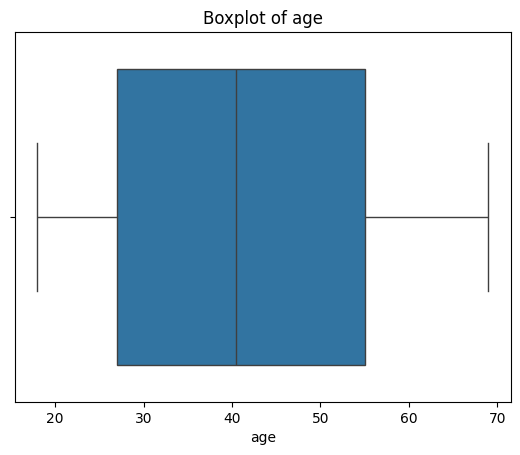

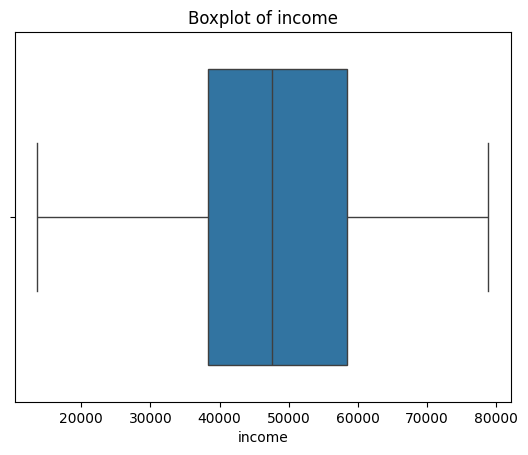

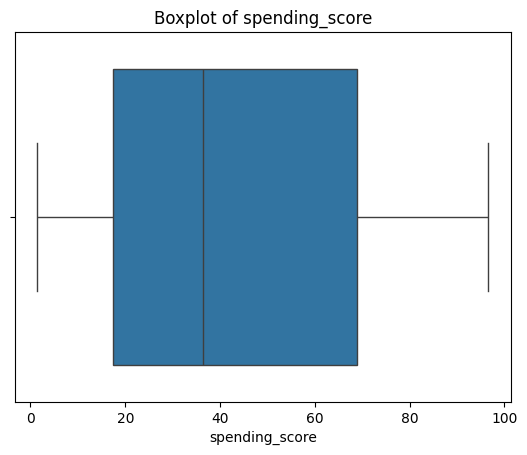

In [4]:
# Write your code from here
for col in ['age', 'income', 'spending_score']:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


Question 5: Categorical Data Analysis
<br>
Description: Explore the counts of categorical variables.

In [5]:
# Write your code from here
print("\nCategory Counts:")
print(df['gender'].value_counts(dropna=False))
print(df['region'].value_counts())


Category Counts:
gender
Male      58
Female    39
NaN        3
Name: count, dtype: int64
region
East     28
West     28
South    22
North    22
Name: count, dtype: int64


Question 6: Data Transformation
<br>
Description: Transform a categorical column into numerical using Label Encoding.

In [6]:
# Write your code from here
le = LabelEncoder()
df['gender_encoded'] = le.fit_transform(df['gender'].astype(str))  # Handles NaN as string
print("\nLabel Encoded 'gender':")
print(df[['gender', 'gender_encoded']].head())


Label Encoded 'gender':
   gender  gender_encoded
0    Male               1
1  Female               0
2  Female               0
3  Female               0
4  Female               0


Question 7: Visualizing Data Distributions
<br>
Description: Plot histograms for numerical columns to understand distributions.

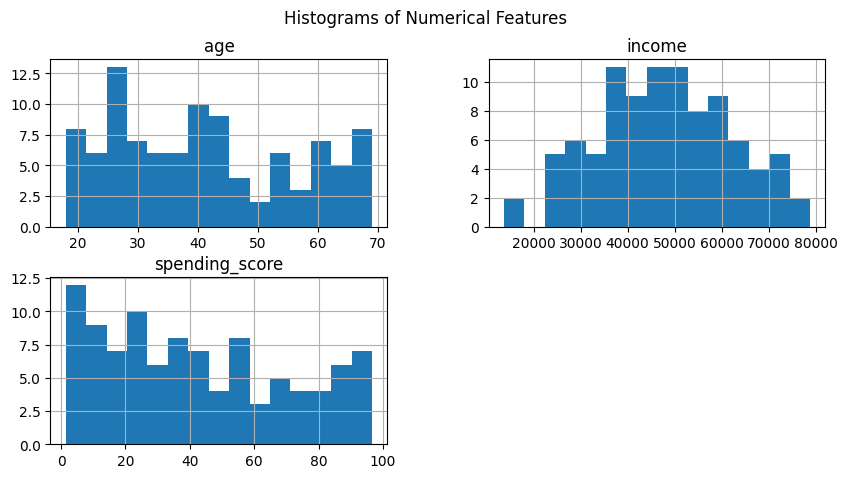

In [7]:
# Write your code from here
df[['age', 'income', 'spending_score']].hist(bins=15, figsize=(10, 5))
plt.suptitle('Histograms of Numerical Features')
plt.show()

Question 8: Correlation Analysis
<br>
Description: Calculate and visualize the correlation matrix for numerical features.

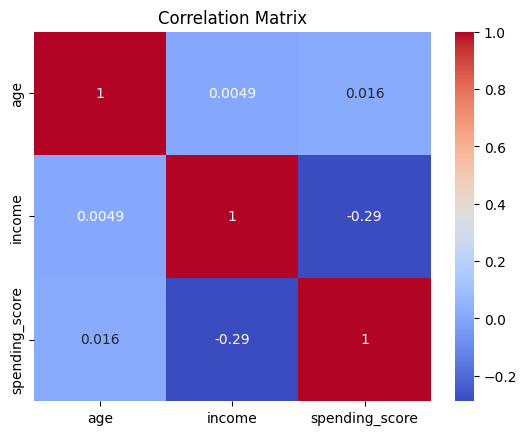

In [8]:
# Write your code from here
corr_matrix = df[['age', 'income', 'spending_score']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Question 9: Feature Engineering
<br>
Description: Create a new feature by combining or transforming existing features.

In [14]:
# Write your code from here
df['income_per_age'] = df['income'] / df['age']
print("\nNew Feature: income_per_age")
print(df[['income', 'age', 'income_per_age']].head()) 


New Feature: income_per_age
         income  age  income_per_age
0  52896.769443   55      961.759444
1  26704.888873   61      437.785063
2  49849.796930   30     1661.659898
3  59737.482997   26     2297.595500
4  73378.593986   27     2717.725703


Question 10: Advanced Outlier Detection
<br>
Description: Use the Z-score method to identify and handle outliers.

In [18]:
# Write your code from here
from scipy.stats import zscore

numeric_cols = ['age', 'income', 'spending_score']
df_numeric = df[numeric_cols].dropna()
z_scores = df_numeric.apply(zscore)
outliers = (np.abs(z_scores) > 3).any(axis=1)
print(f"\nNumber of Outliers Detected (Z-score > 3): {outliers.sum()}")
print("\nOutlier Rows:")
print(df_numeric[outliers])



Number of Outliers Detected (Z-score > 3): 0

Outlier Rows:
Empty DataFrame
Columns: [age, income, spending_score]
Index: []
